# 花式索引(Fancy Indexing)
在前面的小节中，我们看到了如何利用简单的索引值（如arr[0]）、切片（如arr[:5]）和
布尔掩码（如arr[arr > 0]）获得并修改部分数组。在这一节中，我们将介绍另外一种数
组索引，也称作花式索引（fancy indexing）。花式索引和前面那些简单的索引非常类
似，但是传递的是索引数组，而不是单个标量。花式索引让我们能够快速获得并修改复
杂的数组值的子数据集。

In [1]:
import numpy as np

## 探索花式索引

花式索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。
例如以下数组：

In [2]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

假设我们希望获得三个不同的元素，可以用以下方式实现：

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

另外一种方法是通过传递索引的单个列表或数组来获得同样的结果：

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

利用花式索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

In [5]:
ind = np.array([[3, 7],[4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

花式索引也对多个维度适用。假设我们有以下数组：

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col] #这种比较难理解

array([ 2,  5, 11])

这里需要注意，结果的第一个值是X[0, 2]，第二个值是X[1, 1]，第三个值是X[2, 3]。
在花哨的索引中，索引值的配对遵循2.5 节介绍过的广播的规则。因此当我们将一个列向
量和一个行向量组合在一个索引中时，会得到一个二维的结果：

In [8]:
X[row[:, np.newaxis], col] #这种比较难理解

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算：

In [9]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数组的形状，而不是
被索引的数组的形状。

比较一下下面的情况：

In [10]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [11]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]  # 打印arr[1, 0]、arr[5, 3]，arr[7, 1]和arr[2, 2]

array([ 4, 23, 29, 10])

In [12]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [13]:
arr[[1, 5, 7, 2],1]

array([ 5, 21, 29,  9])

In [14]:
arr[[1, 5, 7, 2],1:]

array([[ 5,  6,  7],
       [21, 22, 23],
       [29, 30, 31],
       [ 9, 10, 11]])

In [15]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # 1572行的0312列

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [16]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])] # 可读性更好的写法

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 组合索引
花式索引可以和其他索引方案结合起来形成更强大的索引操作：

In [17]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

可以将花哨的索引和简单的索引组合使用：

In [18]:
X[2, [2, 0, 1]]

array([10,  8,  9])

也可以将花哨的索引和切片组合使用：

In [19]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

更可以将花哨的索引和掩码组合使用：

In [20]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] #比较难理解

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [21]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [22]:
X[row[:, np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

索引选项的组合可以实现非常灵活的获取和修改数组元素的操作。

## 示例：选择随机点

花式索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个N×D 的矩阵，
表示在D 个维度的N 个点。以下是一个二维正态分布的点组成的数组：

In [23]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

可以用散点图将这些点可视化：

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

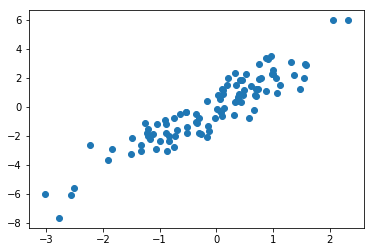

In [25]:
plt.scatter(X[:, 0], X[:, 1]);

我们将利用花式索引随机选取20 个点——选择20 个随机的、不重复的索引值，并利用
这些索引值选取到原始数组对应的值：

In [26]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 7, 14, 70, 51, 33, 11, 36,  0, 85, 95, 18, 17, 75, 26, 64, 71, 96,
       92, 35, 27])

In [27]:
selection = X[indices] # 花哨的索引
selection.shape

(20, 2)

现在来看哪些点被选中了，将选中的点在图上用大圆圈标示出来：

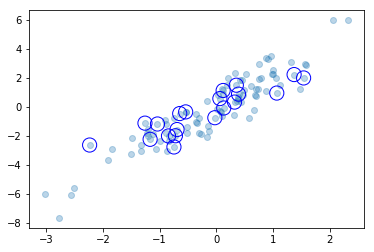

In [28]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', edgecolor='b', s=200)

这种方法通常用于快速分割数据，即需要分割训练/ 测试数据集以验证统计模型时，以及在解答统计问题时的抽样方法中使用。

## 用花式索引修改值
正如花式索引可以被用于获取部分数组，它也可以被用于修改部分数组。例如，假设我
们有一个索引数组，并且希望设置数组中对应的值：

In [29]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


可以用任何的赋值操作来实现，例如：

In [30]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

不过需要注意，操作中重复的索引会导致一些出乎意料的结果产生，如以下例子所示：

In [31]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

4 去哪里了呢？这个操作首先赋值x[0] = 4，然后赋值x[0] = 6，因此当然x[0] 的值为6。
以上还算合理，但是设想以下操作：

In [32]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

你可能期望x[3] 的值为2，x[4] 的值为3，因为这是这些索引值重复的次数。但是为什么
结果不同于我们的预想呢？从概念的角度理解，这是因为x[i] += 1 是x[i] = x[i] + 1 的
简写。x[i] + 1 计算后，这个结果被赋值给了x 相应的索引值。记住这个原理后，我们却
发现数组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。

因此，如果你希望累加，该怎么做呢？你可以借助通用函数中的at() 方法（在NumPy 1.8
以后的版本中可以使用）来实现。进行如下操作：

In [33]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


at() 函数在这里对给定的操作、给定的索引（这里是i）以及给定的值（这里是1）执行
的是就地操作。另一个可以实现该功能的类似方法是通用函数中的reduceat() 函数，你可
以在NumPy 文档中找到关于该函数的更多信息。

## 示例：数据区间划分

你可以用这些方法有效地将数据进行区间划分并手动创建直方图。例如，假定我们有1000
个值，希望快速统计分布在每个区间中的数据频次，可以用ufunc.at 来计算：

In [34]:
np.random.seed(42)
x = np.random.randn(100)

In [35]:
# 手动计算直方图
bins = np.linspace(-5, 5, 20) # 包括5
counts = np.zeros_like(bins)
np.linspace(0, 19, 20)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [36]:
# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

计数数组counts 反映的是在每个区间中的点的个数，即直方图分布：

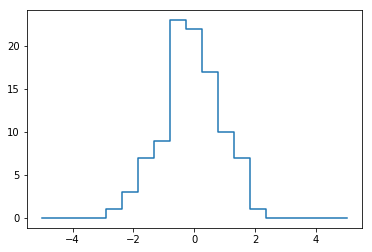

In [37]:
# 画出结果
plt.plot(bins, counts, linestyle='steps');

当然，如果每次需要画直方图你都这么做的话，也是很不明智的。这就是为什么Matplotlib
提供了plt.hist() 方法，该方法仅用一行代码就实现了上述功能：

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

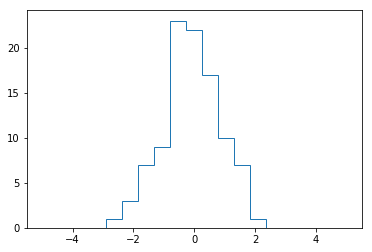

In [38]:
plt.hist(x, bins, histtype='step')

这个函数将生成一个和上图几乎一模一样的图。为了计算区间，Matplotlib 将使用
np.histogram 函数，该函数的计算功能也和上面执行的计算类似。接下来比较一下这两种
方法：

In [39]:
print("NumPy routine:")
%time counts_, edges = np.histogram(x, bins)
print("Custom routine:")
%time np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
Wall time: 0 ns
Custom routine:
Wall time: 0 ns


可以看到，我们一行代码的算法比NumPy 优化过的算法快好几倍！(原作者测试的结果)这是如何做到的呢？
如果你深入np.histogram 源代码（可以在IPython 中输入np.histogram?? 查看源代码），
就会看到它比我们前面用过的简单的搜索和计数方法更复杂。这是由于NumPy 的算法更
灵活（需要适应不同场景），因此在数据点比较大时更能显示出其良好性能：

In [40]:
x = np.random.randn(1000000)
print("NumPy routine:")
%time counts_, edges = np.histogram(x, bins)
print("Custom routine:")
%time np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
Wall time: 56.9 ms
Custom routine:
Wall time: 105 ms


In [41]:
counts

array([0.00000e+00, 2.00000e+00, 3.30000e+01, 2.52000e+02, 1.64700e+03,
       7.15800e+03, 2.37870e+04, 6.12490e+04, 1.21666e+05, 1.81230e+05,
       2.07342e+05, 1.81131e+05, 1.20681e+05, 6.13830e+04, 2.37890e+04,
       6.98600e+03, 1.56600e+03, 2.73000e+02, 1.90000e+01, 6.00000e+00])

In [42]:
counts_

array([     2,     33,    252,   1647,   7156,  23781,  61235, 121648,
       181184, 207298, 181097, 120661,  61369,  23787,   6986,   1566,
          273,     19,      6], dtype=int64)

In [43]:
counts.shape

(20,)

In [44]:
counts_.shape

(19,)

以上比较表明，算法效率并不是一个简单的问题。一个对大数据集非常有效的算法并不总
是小数据集的最佳选择，反之同理。但是自己编写这个算法的好处
是可以理解这些基本方法。你可以利用这些编写好的模块去扩展，以实现一些有意思的自
定义操作。将Python 有效地用于数据密集型应用中的关键是，当应用场景合适时知道使用
np.histogram 这样的现成函数，当需要执行更多指定的操作时也知道如何利用更低级的功
能来实现。